# Лабораторна робота №4
### Тема: Класифікація методом k найближчих сусідів і набір даних Digits

In [2]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

Імпортуємо вбудований в scikit-learn набір даних digits та візуалізуємо його.

In [3]:
df = load_digits()

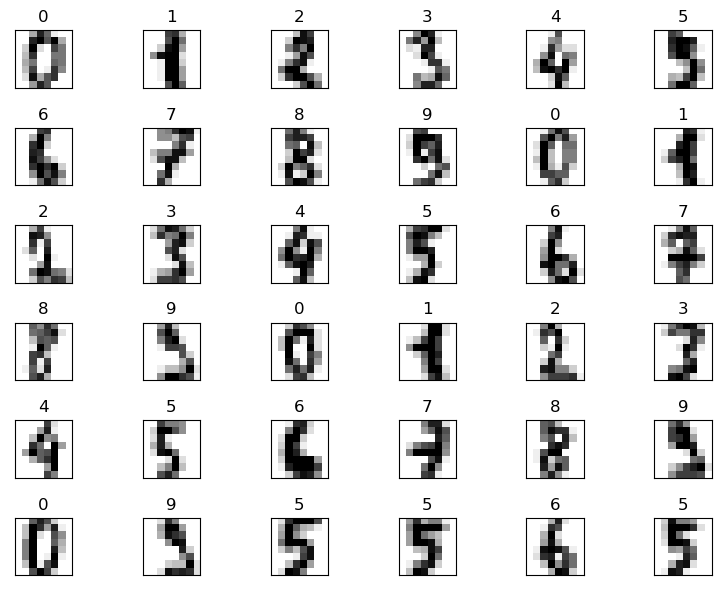

In [6]:
fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(8,6))

for ax, image, label in zip(axes.ravel(), df.images, df.target):
    ax.imshow(image, cmap=plt.cm.gray_r)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(label)

plt.tight_layout()
plt.show()

Розіб'ємо дані для навчання і тестування у співвідношенні 70%:30%

In [4]:
X_train, X_test, y_train, y_test = train_test_split(df.data, df.target, test_size=0.3)
X_train.shape

(1257, 64)

In [5]:
X_test.shape

(540, 64)

Побудуємо та навчимо модель.

In [6]:
modelKNN = KNeighborsClassifier()
modelKNN.fit(X=X_train, y=y_train)

KNeighborsClassifier()

Спрогнозуємо цифри та порівняємо прогнозовані результати з очікуваними для перших 36 зразків.

In [7]:
from warnings import simplefilter

# Ігноруємо попередження, пов'язані зі змінами поведінки деяких функцій в бібліотеці scikit-learn
simplefilter(action='ignore', category=FutureWarning)

predicted = modelKNN.predict(X=X_test)
expected = y_test

In [8]:
predicted[:36]

array([2, 4, 5, 4, 0, 3, 1, 2, 8, 5, 2, 5, 4, 3, 1, 1, 3, 8, 5, 0, 7, 7,
       1, 4, 3, 4, 3, 0, 9, 1, 6, 6, 4, 7, 4, 3])

In [9]:
expected[:36]

array([2, 4, 5, 4, 0, 3, 1, 2, 8, 5, 2, 5, 4, 3, 1, 1, 3, 8, 5, 0, 7, 7,
       1, 4, 3, 4, 3, 0, 9, 1, 6, 6, 4, 7, 4, 3])

#### Оцінимо якість моделі.

In [10]:
print(f'Точність моделі: {modelKNN.score(X_test, y_test):.2%}')

Точність моделі: 97.59%


In [11]:
confusion = confusion_matrix(y_true=expected, y_pred=predicted)
confusion

array([[53,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 56,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 45,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 51,  0,  1,  0,  1,  0,  0],
       [ 0,  0,  0,  0, 62,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 61,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0, 55,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 61,  0,  0],
       [ 0,  2,  1,  0,  0,  0,  0,  0, 38,  0],
       [ 0,  1,  0,  2,  0,  3,  0,  0,  0, 45]], dtype=int64)

In [12]:
names = [str(digit) for digit in df.target_names]
print(classification_report(expected, predicted, target_names=names))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       0.93      1.00      0.97        56
           2       0.98      1.00      0.99        45
           3       0.96      0.96      0.96        53
           4       1.00      0.98      0.99        63
           5       0.94      1.00      0.97        61
           6       1.00      0.98      0.99        56
           7       0.97      1.00      0.98        61
           8       1.00      0.93      0.96        41
           9       1.00      0.88      0.94        51

    accuracy                           0.98       540
   macro avg       0.98      0.97      0.98       540
weighted avg       0.98      0.98      0.98       540



Використаємо ще моделі SVC та GaussianNB для пошуку найкращого результату.

In [13]:
modelSVC = SVC(kernel='linear')
modelSVC.fit(X_train, y_train)

modelGNB = GaussianNB()
modelGNB.fit(X_train, y_train)

GaussianNB()

Порівняємо точність моделей.

In [14]:
print(f'Точність моделі KNN: {modelKNN.score(X_test, y_test):.2%}')
print(f'Точність моделі GaussianNB: {modelGNB.score(X_test, y_test):.2%}')
print(f'Точність моделі SVC: {modelSVC.score(X_test, y_test):.2%}')

Точність моделі KNN: 97.59%
Точність моделі GaussianNB: 86.48%
Точність моделі SVC: 97.41%


Можна зробити висновок, що метод опорних векторів показав себе найточнішою моделлю.

Поекспериментуємо з гіперпараметром k для пошуку найкращого значення. 

In [15]:
for n in range(1, 12):
    modelKNN = KNeighborsClassifier(n_neighbors=n)
    modelKNN.fit(X=X_train, y=y_train)
    print(f'Гіперпараметр К дорівнює {n}, точність при цьому: {modelKNN.score(X_test, y_test):.2%}')

Гіперпараметр К дорівнює 1, точність при цьому: 98.33%
Гіперпараметр К дорівнює 2, точність при цьому: 97.96%
Гіперпараметр К дорівнює 3, точність при цьому: 98.52%
Гіперпараметр К дорівнює 4, точність при цьому: 97.78%
Гіперпараметр К дорівнює 5, точність при цьому: 97.59%
Гіперпараметр К дорівнює 6, точність при цьому: 97.59%
Гіперпараметр К дорівнює 7, точність при цьому: 98.15%
Гіперпараметр К дорівнює 8, точність при цьому: 97.59%
Гіперпараметр К дорівнює 9, точність при цьому: 98.33%
Гіперпараметр К дорівнює 10, точність при цьому: 98.15%
Гіперпараметр К дорівнює 11, точність при цьому: 97.59%


Найкращим виявився параметр k=3 (за замовчуванням цей параметр дорівнює 5)